In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:

# ---------------------------
# 1. Xử lý dữ liệu: Đọc file và chuẩn hóa
# ---------------------------
class DataSource:
    def _load_raw_data(self, filename, is_train=True):
        print("Đang đọc dữ liệu từ file:", filename)
        samples = []
        current_sample = []
        # Kiểm tra xem file có tồn tại hay không và in ra một vài dòng đầu tiên để xác nhận
        with open(filename, 'r', encoding='UTF-8') as file:
            lines = file.readlines()
            # In 5 dòng đầu tiên để kiểm tra dữ liệu
            print("5 dòng đầu file:", lines[:5])
            regex = 'train_'
            for line in lines:
                # Nếu tìm thấy từ 'train_' trong dòng, bắt đầu sample mới
                if regex in line:
                    if current_sample:
                        samples.append(current_sample)
                    current_sample = [line.strip()]
                elif line.strip() != '':
                    current_sample.append(line.strip())
            if current_sample:
                samples.append(current_sample)
        print("Tổng số sample đọc được:", len(samples))
        return samples

    def _create_row(self, sample, is_train=True):
        # In ra sample để kiểm tra định dạng
        print("Xử lý sample:", sample)
        row = {}
        row['id'] = sample[0]
        review = ""
        if is_train:
            # Các câu từ sample[1] đến câu trước cuối chứa review, câu cuối là nhãn
            for clause in sample[1:-1]:
                review += clause.strip() + " "
            row['label'] = int(sample[-1])
        else:
            for clause in sample[1:]:
                review += clause.strip() + " "
        row['review'] = review.strip()
        return row

    def load_data(self, filename, is_train=True):
        raw_data = self._load_raw_data(filename, is_train)
        data_list = []
        for sample in raw_data:
            data_list.append(self._create_row(sample, is_train))
        # In ra 3 sample đầu để xác nhận định dạng dữ liệu
        print("3 sample đầu sau khi xử lý:")
        for sample in data_list[:3]:
            print(sample)
        return data_list


In [5]:
PATHTRAIN = '../data/train.crash'
dataTrain = DataSource().load_data(PATHTRAIN)

Đang đọc dữ liệu từ file: ../data/train.crash
5 dòng đầu file: ['train_000000\n', '"Dung dc sp tot cam on \n', 'shop Đóng gói sản phẩm rất đẹp và chắc chắn Chất lượng sản phẩm tuyệt vời"\n', '0\n', '\n']
Tổng số sample đọc được: 16087
Xử lý sample: ['train_000000', '"Dung dc sp tot cam on', 'shop Đóng gói sản phẩm rất đẹp và chắc chắn Chất lượng sản phẩm tuyệt vời"', '0']
Xử lý sample: ['train_000001', '" Chất lượng sản phẩm tuyệt vời . Son mịn nhưng khi đánh lên không như màu trên ảnh"', '0']
Xử lý sample: ['train_000002', '" Chất lượng sản phẩm tuyệt vời nhưng k có hộp k có dây giày đen k có tất"', '0']
Xử lý sample: ['train_000003', '":(( Mình hơi thất vọng 1 chút vì mình đã kỳ vọng cuốn sách khá nhiều hi vọng nó sẽ nói về việc học tập của cách sinh viên trường Harvard ra sao những nỗ lực của họ như thế nào 4h sáng? tại sao họ lại phải thức dậy vào thời khắc đấy? sau đó là cả một câu chuyện ra sao. Cái mình thực sự cần ở đây là câu chuyện ẩn dấu trong đó để tự bản thân mỗi người cảm

In [6]:
print(dataTrain[:5])

[{'id': 'train_000000', 'label': 0, 'review': '"Dung dc sp tot cam on shop Đóng gói sản phẩm rất đẹp và chắc chắn Chất lượng sản phẩm tuyệt vời"'}, {'id': 'train_000001', 'label': 0, 'review': '" Chất lượng sản phẩm tuyệt vời . Son mịn nhưng khi đánh lên không như màu trên ảnh"'}, {'id': 'train_000002', 'label': 0, 'review': '" Chất lượng sản phẩm tuyệt vời nhưng k có hộp k có dây giày đen k có tất"'}, {'id': 'train_000003', 'label': 1, 'review': '":(( Mình hơi thất vọng 1 chút vì mình đã kỳ vọng cuốn sách khá nhiều hi vọng nó sẽ nói về việc học tập của cách sinh viên trường Harvard ra sao những nỗ lực của họ như thế nào 4h sáng? tại sao họ lại phải thức dậy vào thời khắc đấy? sau đó là cả một câu chuyện ra sao. Cái mình thực sự cần ở đây là câu chuyện ẩn dấu trong đó để tự bản thân mỗi người cảm nhận và đi sâu vào lòng người hơn. Còn cuốn sách này chỉ đơn thuần là cuốn sách dạy kĩ năng mà hầu như sách nào cũng đã có. BUồn..."'}, {'id': 'train_000004', 'label': 1, 'review': '"Lần trước

In [17]:
df = pd.DataFrame(dataTrain)
print(df.head())
print("Tổng số dòng: ",df.shape[0])
print("Tổng số cột: ",df.shape[1])

             id  label                                             review
0  train_000000      0  "Dung dc sp tot cam on shop Đóng gói sản phẩm ...
1  train_000001      0  " Chất lượng sản phẩm tuyệt vời . Son mịn nhưn...
2  train_000002      0  " Chất lượng sản phẩm tuyệt vời nhưng k có hộp...
3  train_000003      1  ":(( Mình hơi thất vọng 1 chút vì mình đã kỳ v...
4  train_000004      1  "Lần trước mình mua áo gió màu hồng rất ok mà ...
Tổng số dòng:  16087
Tổng số cột:  3


C:\Users\Admin\AppData\Local\Temp\ipykernel_19436\3393846282.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')


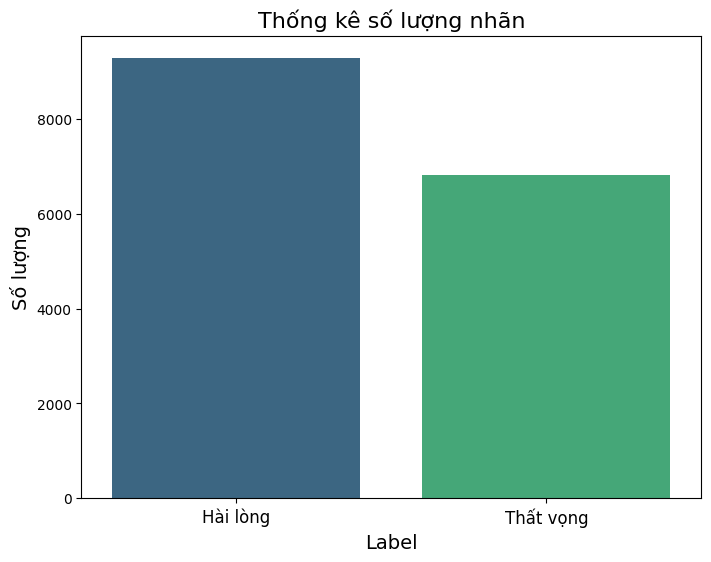

In [9]:
import seaborn as sns
label_counts = df['label'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')
plt.title('Thống kê số lượng nhãn', fontsize=16)
plt.xlabel('Label', fontsize=14)
plt.ylabel('Số lượng', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['Hài lòng', 'Thất vọng'], fontsize=12)
plt.show()

In [ ]:
total_missing_rows = df.isnull().any(axis=1).sum()
print(f"Tổng số dòng chứa giá trị rỗng: {total_missing_rows}")

Tổng số dòng chứa giá trị rỗng: 0
